# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict weather the parkinglot is occupied or empty. You are provided with a dataset of parkinglot images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation)
### **Dataset Name:** ParkingLot Occupation

### **Description:**  
The dataset contains images of labeld parkinglot images for classification purposes. Each image belongs to one of the 2 classes, representing the label.

### **Labels:**
* `empty`
* `occupied`


## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation).

In [ ]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [2]:
data_dir_train = '/content/ParkingLot_Occupation/train'

In [3]:
data_dir_test = '/content/ParkingLot_Occupation/test'

## Data Splitting
In this section, we will split our dataset into three parts:

* `train` Folder: Training set (85%).
* `train` Folder: Validation set (15%).
* `test` Folder: Test set (100%).

In [32]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.15)

In [33]:
train_generator= datagen.flow_from_directory(
    data_dir_train,
    target_size = (150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    data_dir_train,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle = True
)

test_generator = datagen.flow_from_directory(
    data_dir_test,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle = True
)

Found 1175 images belonging to 2 classes.
Found 207 images belonging to 2 classes.
Found 344 images belonging to 2 classes.


## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [34]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))

#model.add(Dense(512, activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))

#model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
#model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 34, 34, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 15, 15, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             785 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,265 (169.00 KB)

 Trainable params: 43,265 (169.00 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [37]:
history = model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=25,
    validation_data=val_generator
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4776 - loss: 0.6792 - val_accuracy: 0.4686 - val_loss: 0.6341
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.4661 - loss: 0.6102 - val_accuracy: 0.9034 - val_loss: 0.5273
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8376 - loss: 0.4891 - val_accuracy: 0.9082 - val_loss: 0.4157
Epoch 4/25
 7/10 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.9331 - loss: 0.4046

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9331 - loss: 0.3996 - val_accuracy: 0.9227 - val_loss: 0.3599
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9398 - loss: 0.3395 - val_accuracy: 0.9179 - val_loss: 0.2533
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8914 - loss: 0.3055 - val_accuracy: 0.8937 - val_loss: 0.2306
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9045 - loss: 0.2696 - val_accuracy: 0.9275 - val_loss: 0.2011
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9408 - loss: 0.1962 - val_accuracy: 0.9662 - val_loss: 0.1488
Epoch 9/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9402 - loss: 0.1850 - val_accuracy: 0.9565 - val_loss: 0.1300
Epoch 10/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9420 - loss: 0.1476 - val_accuracy: 0.9420 - val_loss: 0.1192
Epoch 11/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9461 - loss: 0.1552 - val_accuracy: 0.9517 - val_loss: 0.1585
E

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [38]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Loss: ',test_loss)
print('Accuracy: ',test_accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 513ms/step - accuracy: 0.9298 - loss: 0.1607
Loss:  0.1371803879737854
Accuracy:  0.944767415523529


## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

If you ran the command above, you should have a file called ParkingLot_Occupation in your current directory. which contains the testing dataset.
If you ran the command above <span style='color:red;'>DON'T RUN THIS CELL</span>

In [39]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation
License(s): unknown
parkinglot-occupation.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  parkinglot-occupation.zip
replace ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [40]:
predictions = model.predict(test_generator)
predictions

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 501ms/step


array([[0.20311663],
       [0.06324182],
       [0.55760205],
       [1.        ],
       [0.0944768 ],
       [0.16776718],
       [0.9999989 ],
       [1.        ],
       [0.99968433],
       [0.05929981],
       [1.        ],
       [0.05532812],
       [0.08070267],
       [0.15289599],
       [0.06274417],
       [0.1128158 ],
       [0.06561358],
       [0.999861  ],
       [0.1233691 ],
       [0.05068896],
       [0.20481075],
       [0.0600676 ],
       [0.05409781],
       [1.        ],
       [0.24435313],
       [1.        ],
       [0.06949368],
       [0.08831541],
       [0.06590664],
       [0.06238477],
       [0.07990506],
       [0.04049311],
       [0.06152027],
       [1.        ],
       [1.        ],
       [0.05843728],
       [0.79099876],
       [1.        ],
       [1.        ],
       [0.04385704],
       [1.        ],
       [1.        ],
       [0.05376175],
       [0.04911286],
       [0.05175191],
       [0.9998898 ],
       [0.05346652],
       [0.089

## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

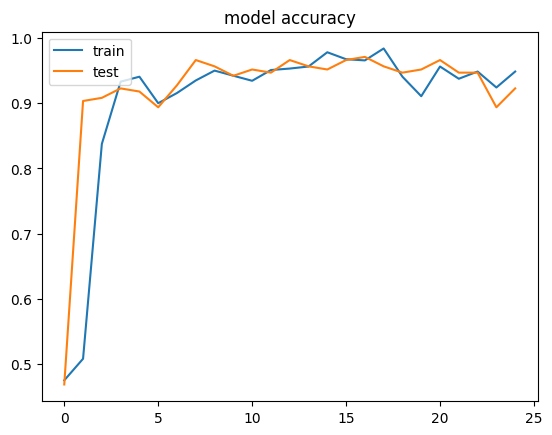

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

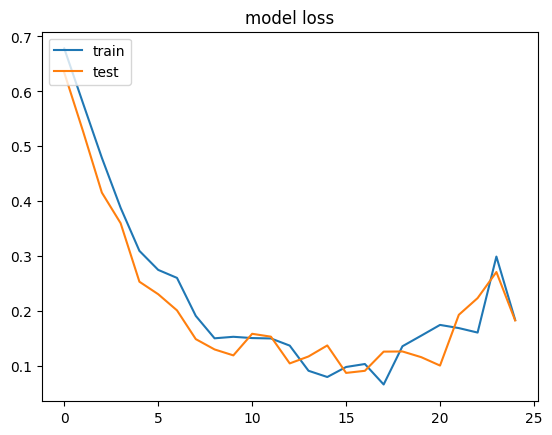

In [43]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Save the Model
Save the trained CNN model for submission.

In [42]:
model.save('model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

1.   For the data preprocessing i applied resize, i also rescaled the photos.
2.  For the model architecture i add 4 Convolutional layers with max-pooling then i added a flatten layer with dropout and the output layer was the only dense layer it was the best model after some trials.
3.   For the Activation Functions i used relu in the input and hidden layers but sigmoid in the output function since my data is binary
4.   For the batch size i set it as 32 it is good for photos, but the epochs i set it as 25 i think if i applied early stopping i would've got a better result.
5.   I chose accuracy since it is a classification model, likewise for the loss function.
6.   I applied dropout before the output layer.
7.   I evaluated it in the test data using accuracy and by analysing the loss
8.   The accuracy and loss curves proves that the model is not overfitted or underfitted.
9. On one of the triels i encountered overfitting because i Initialised the val data incorrectly but it was also an effect of the multiple dense layers i put first.







